# HW1 - Graph Search

## Prepare Phase

> This notebook is designed to be run in a local environment. If you rather a google colab notebook use `HW1_40131383_colab.ipynb`.

> Note: This phase involves adding the datasets and libraries. Please install use `pipenv install --dev` to install the required libraries and `pipenv shell` to activate the virtual environment. Be carefull to use this environment as kernel for this notebook.

> This notebook should be run from `Homework1` directory Otherwise it can't find the datasets.

#### Import libraries

In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import gzip
from typing import Dict
SEED = 71

#### Import datasets

In [2]:
# You should run this at IUT-Graph-Mining-Course/HomeWorks/HomeWork1
project_root = '../../'
datasets_dir = project_root + 'Data Sets/'
basic_dir = datasets_dir + 'Basic/'
intermediate_dir = datasets_dir + 'Intermediate/'

##### Load basic datasets for this HW

In [3]:
facebook_dir = basic_dir + 'Facebook Dataset/'
cora_citation_network_dir = basic_dir + 'Cora Citation Network/'
zachary_karate_club_dir = basic_dir + "Zachary's karate club/"

facebook_dataset_file = facebook_dir + 'facebook_combined.txt.gz'
cora_citation_network_file = cora_citation_network_dir + 'cora.cites'
zachary_karate_club_file = zachary_karate_club_dir + 'karate.gml'


facebook: nx.Graph = nx.read_edgelist(
    gzip.open(facebook_dataset_file), nodetype=int)
# core : nx.Graph = nx.read_edgelist(
#     cora_citation_network_file, nodetype=int)
karate: nx.Graph = nx.read_gml(zachary_karate_club_file)
print("Datasets loaded successfully.")

Datasets loaded successfully.


For this HomeWork, I only need 2 basic datasets so I will only use **facebook** and **karate** datasets from basic datasets. 

## Section 1:  Structural Analysis of Real Networks

### Q1:Ask a research question for each Dataset. For example:

- Does the network exhibit a power-law degree distribution? 
- Does it show small-world properties?

#### Answer:
1. Karate: Does it show small-world properties?
2. Facebook: Does the network exhibit a power-law degree distribution?

**small-world properties**: A small-world network is a type of graph in which most nodes can be reached from every other by a small number of steps. This means that the average path length between any two nodes is relatively short, even in large networks. Small-world networks also tend to have a high clustering coefficient, meaning that nodes that are connected to a common node are more likely to be connected to each other.

**power-law degree distribution**: A power-law degree distribution is a type of statistical distribution that describes the frequency of nodes in a network based on their degree (the number of connections they have to other nodes). In a power-law distribution, a small number of nodes have a very high degree, while the majority of nodes have a low degree. This results in a "long tail" in the distribution, where there are many nodes with low degrees and a few nodes with very high degrees.

#### My guess:
1. Karate: Yes, because it is a social network and social networks usually have small-world properties.
2. Facebook: Yes, again because it is a social network and social networks usually exhibit power-law degree distribution. Some users have many friends while most users have few friends.

### Q2: Compute at least five metrics for each dataset, such as:

1. Degree distribution
2. Clustering coefficient
3. Average path length
4. Degree correlation (assortativity)
5. Number of connected components

And other relevant indices.

##### Karate Metrics

In [4]:
karate_node_number = karate.number_of_nodes()
karate_edge_number = karate.number_of_edges()
karate_density = nx.density(karate)
karate_degree_sequence: list = [d for n, d in karate.degree()]
karate_degree_avg = np.mean(karate_degree_sequence)
karate_clustering_coeffs = list(nx.clustering(karate).values())
karate_clustering_avg = np.mean(karate_clustering_coeffs) 
karate_path_length = [item for node in nx.shortest_path_length(karate) 
                      for item in list(node[1].values())[1:]] # getting all path lengths except path to itself 
karate_path_length_avg = np.mean(karate_path_length) # Same as average_shortest_path_length
karate_degree_assortativity = nx.degree_assortativity_coefficient(karate)
karate_connected_components_number = nx.number_connected_components(karate)

##### FaceBook Metrics

>Note: This one may take one minutes

In [5]:
facebook_node_number = facebook.number_of_nodes()
facebook_edge_number = facebook.number_of_edges()
facebook_density = nx.density(facebook)
facebook_degree_sequence: list = [d for n, d in facebook.degree()]
facebook_degree_avg = np.mean(facebook_degree_sequence)
facebook_clustering_coeffs = list(nx.clustering(facebook).values())
facebook_clustering_avg = np.mean(facebook_clustering_coeffs)
facebook_path_length = [item for node in nx.shortest_path_length(facebook)
                      # getting all path lengths except path to itself
                      for item in list(node[1].values())[1:]]
# Same as average_shortest_path_length
facebook_path_length_avg = np.mean(facebook_path_length)
facebook_degree_assortativity = nx.degree_assortativity_coefficient(facebook)
facebook_connected_components_number = nx.number_connected_components(facebook)

### Q3: For each computed metric, explain why you chose it and what you expected before calculating it.

#### Answer:
1. **Density**: I chose this metric because it gives an idea of how connected the network is. I expected the density to be low because social networks usually have a lot of nodes but not all nodes are connected to each other.
    - **Karate**: The density is relatively high because it is a small network with only 34 nodes and many connections between them. My guess $\rightarrow 0.2$
    - **Facebook**: The density is low because it is a large network with many nodes and not all nodes are connected to each other. My guess $\rightarrow 0.05$
2. **Degree Distribution and it's average**: I chose this metric because it gives an idea of how many connections each node has.
    - **Karate**: The network is small, so I expected the degree distribution to be relatively normal. My guess is that average degree is near $3$.
    - **Facebook**: The degree distribution follows a power-law distribution because it is a large network with many nodes. it should be skewed to the right because few nodes have many connections and others have few connections. My guess is that average degree is near $20$. 
3. **Clustering Coefficient and it's average**: I chose this metric because it shows how nodes are clustered together.
    - **Karate**: I expected the clustering coefficient to be high because it is a small network and nodes are more likely to be connected to each other. My guess $\rightarrow 0.4$
    - **Facebook**: I expected the clustering coefficient to be low because it is a large network and nodes are less likely to be connected to each other. My guess $\rightarrow 0.1$
4. **Path Length and it's average**: I chose this metric because it shows how many steps it takes to get from one node to another. It can show that the network has small-world properties or not.
    - **Karate**: I expected the average path length to be low because it is a small network and nodes are more likely to be connected to each other. My guess $\rightarrow 2.5$
    - **Facebook**: I expected the average path length to be low because social networks usually have small-world properties. My guess $\rightarrow 5$
5. **Degree Assortativity**: I chose this metric because it shows the tendency of nodes to connect to other nodes with similar degrees. 
    - **Karate**: I expected the degree assortativity to be negative because nodes with high degrees are the coaches and they are less likely to connect to each other. They are connected to their students. My guess $\rightarrow -0.1$
    - **Facebook**: I expected the degree assortativity to be positive because famous people are more likely to connect to other famous people. My guess $\rightarrow 0.1$
6. **Largest Connected Component (LCC)**: It can show that if every nodes are connected to each other or not.
    - **Karate**: Probably every one is connected. There should be only 1 component. 
    - **Facebook**: Again, It's a socia media everyone is connected.

#### Results:

In [6]:

print(f"{'Metric':35} {'Facebook':>15} {'Karate':>15}")
print("-" * 70)
print(f"{'Number of Nodes:':35} {facebook_node_number:>15} {karate_node_number:>15}")
print(f"{'Number of Edges:':35} {facebook_edge_number:>15} {karate_edge_number:>15}")
print(f"{'Density:':35} {facebook_density:>15.4f} {karate_density:>15.4f}")
print(f"{'Average Degree:':35} {facebook_degree_avg:>15.4f} {karate_degree_avg:>15.4f}")
print(f"{'Average Clustering Coefficient:':35} {facebook_clustering_avg:>15.4f} {karate_clustering_avg:>15.4f}")
print(f"{'Average Path Length:':35} {facebook_path_length_avg:>15.4f} {karate_path_length_avg:>15.4f}")
print(f"{'Degree Assortativity:':35} {facebook_degree_assortativity:>15.4f} {karate_degree_assortativity:>15.4f}")
print(f"{'Number of Connected Components:':35} {facebook_connected_components_number:>15} {karate_connected_components_number:>15}")

Metric                                     Facebook          Karate
----------------------------------------------------------------------
Number of Nodes:                               4039              34
Number of Edges:                              88234              78
Density:                                     0.0108          0.1390
Average Degree:                             43.6910          4.5882
Average Clustering Coefficient:              0.6055          0.5706
Average Path Length:                         3.6925          2.4082
Degree Assortativity:                        0.0636         -0.4756
Number of Connected Components:                   1               1


### Q4: Visualize and interpret the structure of each network using charts or diagrams.

##### Degree Distribution

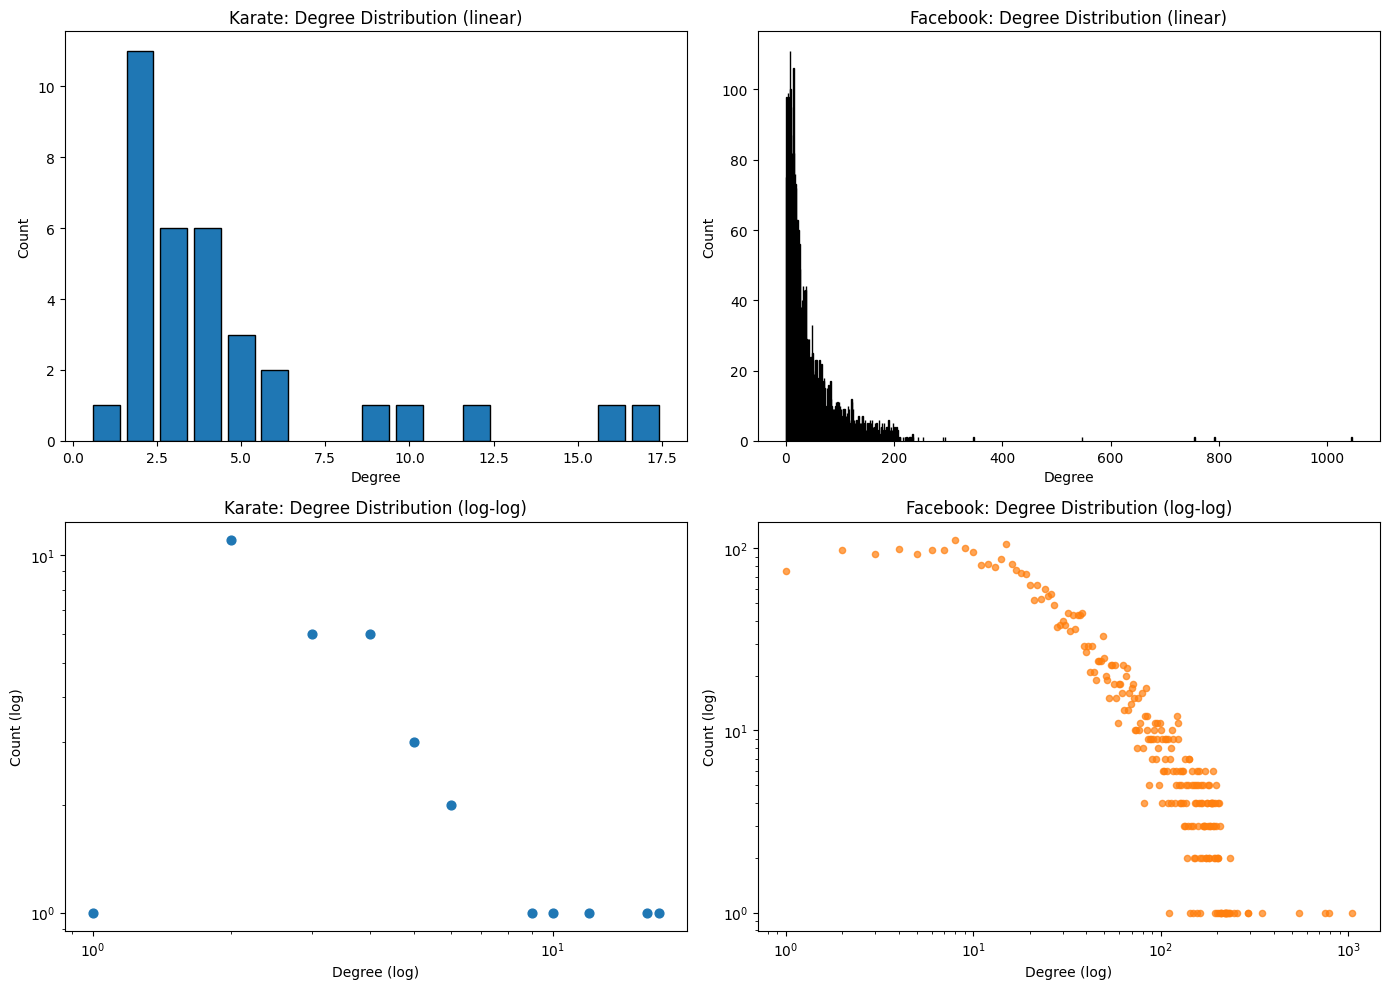

In [7]:
# Degree distribution plots for karate and facebook (uses existing variables:
# karate_degree_sequence, facebook_degree_sequence, plt)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

def degree_counts(deg_seq:list):
    deg_arr = np.array(deg_seq, dtype=int)
    max_d = deg_arr.max()
    counts = np.bincount(deg_arr, minlength=max_d + 1)
    degrees = np.arange(len(counts))
    nonzero = counts > 0
    return degrees, counts, nonzero

# Karate - linear histogram
deg_k, counts_k, nz_k = degree_counts(karate_degree_sequence)
axs[0, 0].bar(deg_k[nz_k], counts_k[nz_k], color='C0', edgecolor='k')
axs[0, 0].set_title('Karate: Degree Distribution (linear)')
axs[0, 0].set_xlabel('Degree')
axs[0, 0].set_ylabel('Count')

# Facebook - linear histogram
deg_f, counts_f, nz_f = degree_counts(facebook_degree_sequence)
axs[0, 1].bar(deg_f[nz_f], counts_f[nz_f], color='C1', edgecolor='k')
axs[0, 1].set_title('Facebook: Degree Distribution (linear)')
axs[0, 1].set_xlabel('Degree')
axs[0, 1].set_ylabel('Count')

# Karate - log-log degree vs frequency
axs[1, 0].scatter(deg_k[nz_k], counts_k[nz_k], s=40, color='C0')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Karate: Degree Distribution (log-log)')
axs[1, 0].set_xlabel('Degree (log)')
axs[1, 0].set_ylabel('Count (log)')

# Facebook - log-log degree vs frequency
axs[1, 1].scatter(deg_f[nz_f], counts_f[nz_f], s=20, color='C1', alpha=0.7)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Facebook: Degree Distribution (log-log)')
axs[1, 1].set_xlabel('Degree (log)')
axs[1, 1].set_ylabel('Count (log)')

plt.tight_layout()
plt.show()

##### Coefficients distribution

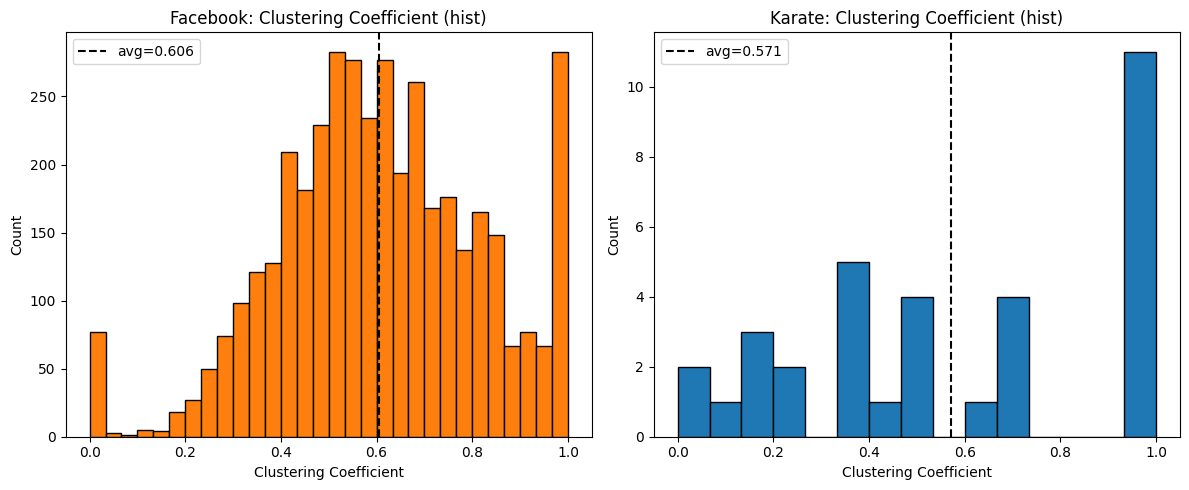

In [8]:
# Visualize clustering coefficient distributions for Facebook and Karate (histograms only)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# extract values
fc_vals = np.array(facebook_clustering_coeffs, dtype=float)
kc_vals = np.array(karate_clustering_coeffs, dtype=float)

# Facebook histogram
axs[0].hist(fc_vals, bins=30, color='C1', edgecolor='k')
axs[0].axvline(facebook_clustering_avg, color='k', linestyle='--',
               label=f"avg={facebook_clustering_avg:.3f}")
axs[0].set_title('Facebook: Clustering Coefficient (hist)')
axs[0].set_xlabel('Clustering Coefficient')
axs[0].set_ylabel('Count')
axs[0].legend()

# Karate histogram
axs[1].hist(kc_vals, bins=15, color='C0', edgecolor='k')
axs[1].axvline(karate_clustering_avg, color='k', linestyle='--',
               label=f"avg={karate_clustering_avg:.3f}")
axs[1].set_title('Karate: Clustering Coefficient (hist)')
axs[1].set_xlabel('Clustering Coefficient')
axs[1].set_ylabel('Count')
axs[1].legend()

plt.tight_layout()
plt.show()


##### Shortest path distribution

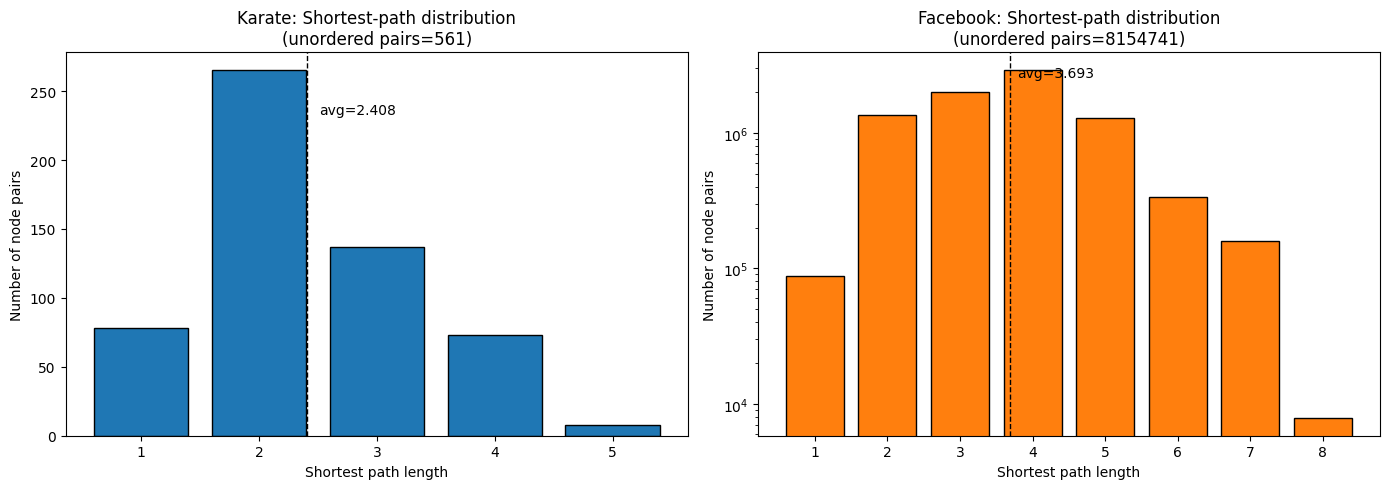

In [9]:
# Visualize shortest-path length distribution correcting for double-counting
# (each unordered pair appears twice in the stored _path_length lists)
kp = np.array(karate_path_length, dtype=int)
fp = np.array(facebook_path_length, dtype=int)

counts_kp = np.bincount(kp).astype(float)
counts_fp = np.bincount(fp).astype(float)

# each shortest path was counted twice (u->v and v->u) for undirected graphs
counts_kp = counts_kp / 2.0
counts_fp = counts_fp / 2.0

# plot only non-zero bins
nz_k = np.where(counts_kp > 0)[0]
nz_f = np.where(counts_fp > 0)[0]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Karate plot + average annotation
axs[0].bar(nz_k, counts_kp[nz_k], color='C0', edgecolor='k')
axs[0].set_title(f'Karate: Shortest-path distribution\n(unordered pairs={int(karate_node_number*(karate_node_number-1)/2)})')
axs[0].set_xlabel('Shortest path length')
axs[0].set_ylabel('Number of node pairs')
avg_k = float(karate_path_length_avg)
axs[0].axvline(avg_k, color='k', linestyle='--', linewidth=1)
ypos_k = counts_kp[nz_k].max() * 0.88
axs[0].text(avg_k + 0.1, ypos_k, f"avg={avg_k:.3f}", color='k')

# Facebook plot + average annotation
axs[1].bar(nz_f, counts_fp[nz_f], color='C1', edgecolor='k')
axs[1].set_title(f'Facebook: Shortest-path distribution\n(unordered pairs={int(facebook_node_number*(facebook_node_number-1)/2)})')
axs[1].set_xlabel('Shortest path length')
axs[1].set_ylabel('Number of node pairs')
axs[1].set_yscale('log') # log scale for better visibility
avg_f = float(facebook_path_length_avg)
axs[1].axvline(avg_f, color='k', linestyle='--', linewidth=1)
ypos_f = counts_fp[nz_f].max() * 0.88
axs[1].text(avg_f + 0.1, ypos_f, f"avg={avg_f:.3f}", color='k')

plt.tight_layout()
plt.show()

### Q5: Analyze your results:

|Metric|Facebook|My guess|Karate|My guess|
|:---:|:---:|:---:|:---:|:---:|
|Density|0.0108|0.05|0.139|0.2|
|Average Degree|43.691|20|4.5882|3|
|Average Clustering Coefficient|0.6055|0.1|0.5706|0.4|
|Average Path Length|3.6925|5|2.4082|2.5|
|Degree Assortativity|0.0636 | 0.1|-0.4756|-0.1|
|Number of Connected Components|1|1|1|1|

##### What findings were expected?
- **Density**: Both of them were lower than my guess but still in expected range. 
- **Average Degree**: Both of them were higher than my guess but still in expected range.
- **Average Path Length**: Both of them were lower than my guess but still in expected range. 
- **Number of Connected Components**: Both of them were as I expected.
##### What findings were unexpected?
- **Average Clustering Coefficient**: Karate was higher than my guess but Facebook was way higher than my guess. I expected it to be low but it was high. 
- **Degree Assortativity**: Karate was way lower than my guess. I expected it to be negative but it was much more negative than I expected. Facebook was lower than my guess but still positive as I expected.

## Section 2 Reproducing Networks Using Models (Small-World and Random Networks)

### Q1: For one of the real networks, generate two synthetic networks using:

- Erdős–Rényi random model, with the same $n$ and $m$ as the real network.
- Watts–Strogatz small-world model, with the same $n$ and average degree as the real network.

#### Answer:

Let's use Facebook dataset for this question.

In [10]:
G_er: nx.Graph = nx.gnm_random_graph(facebook_node_number, facebook_edge_number,seed=SEED) 
# or we could say G_er: nx.Graph = nx.erdos_renyi_graph(facebook_node_number, facebook_density, seed=SEED)
G_ws : nx.Graph = nx.watts_strogatz_graph(facebook_node_number, int(facebook_degree_avg), 0.1, seed=SEED)

### Q2: Compare the degree distribution, clustering coefficient, and average path length of the real and generated networks.

In [11]:
G_er_node_number = G_er.number_of_nodes()
G_er_edge_number = G_er.number_of_edges()
G_er_density = nx.density(G_er)
G_er_degree_sequence: list = [d for n, d in G_er.degree()]
G_er_degree_avg = np.mean(G_er_degree_sequence)
G_er_clustering_coeffs = list(nx.clustering(G_er).values())
G_er_clustering_avg = np.mean(G_er_clustering_coeffs)
G_er_path_length = [item for node in nx.shortest_path_length(G_er) 
                      for item in list(node[1].values())[1:]] # getting all path lengths except path to itself 
G_er_path_length_avg = np.mean(G_er_path_length) # Same as average_shortest_path_length

G_ws_node_number = G_ws.number_of_nodes()
G_ws_edge_number = G_ws.number_of_edges()
G_ws_density = nx.density(G_ws) 
G_ws_degree_sequence: list = [d for n, d in G_ws.degree()]
G_ws_degree_avg = np.mean(G_ws_degree_sequence)
G_ws_clustering_coeffs = list(nx.clustering(G_ws).values())
G_ws_clustering_avg = np.mean(G_ws_clustering_coeffs)
G_ws_path_length = [item for node in nx.shortest_path_length(G_ws) 
                      for item in list(node[1].values())[1:]] # getting all path lengths except path to itself 
G_ws_path_length_avg = np.mean(G_ws_path_length) # Same as average_shortest_path_length

#### Comparison of Metrics

In [12]:
print(f"{'Metric':35} {'Facebook':>15} {'Erdos-Renyi':>15} {'Watts-Strogatz':>15}")
print("-" * 85)
print(f"{'Number of Nodes:':35} {facebook_node_number:>15} {G_er_node_number:>15} {G_ws_node_number:>15}")
print(f"{'Number of Edges:':35} {facebook_edge_number:>15} {G_er_edge_number:>15} {G_ws_edge_number:>15}")
print(f"{'Density:':35} {facebook_density:>15.4f} {G_er_density:>15.4f} {G_ws_density:>15.4f}")
print(f"{'Average Degree:':35} {facebook_degree_avg:>15.4f} {G_er_degree_avg:>15.4f} {G_ws_degree_avg:>15.4f}")
print(f"{'Average Clustering Coefficient:':35} {facebook_clustering_avg:>15.4f} {G_er_clustering_avg:>15.4f} {G_ws_clustering_avg:>15.4f}")
print(f"{'Average Path Length:':35} {facebook_path_length_avg:>15.4f} {G_er_path_length_avg:>15.4f} {G_ws_path_length_avg:>15.4f}")

Metric                                     Facebook     Erdos-Renyi  Watts-Strogatz
-------------------------------------------------------------------------------------
Number of Nodes:                               4039            4039            4039
Number of Edges:                              88234           88234           84819
Density:                                     0.0108          0.0108          0.0104
Average Degree:                             43.6910         43.6910         42.0000
Average Clustering Coefficient:              0.6055          0.0109          0.5348
Average Path Length:                         3.6925          2.6059          3.0009


It seems that they are similar in terms of **density** and **average degree** because we set those parameters for generating the networks. But other metrics are different. For example, average **clustering coefficient** of Watts-Strogatz model is closer to real network but still lower than it and in Erdos-Renyi model it is way lower than real network. Also **average path length** of both is less than real network. Overall Watts-Strogatz model is closer to real network.

### Q3: Using the Erdős–Rényi model, vary the random parameter $r$ to approximate the real network’s properties

Explain the process and reasoning behind your choice of $r$.

#### Answer: 
We probably need to fix the clustering coefficient because it's the one that is not close enough to the real network more than others. Only parameter that we can change is $r$ (probability of edge creation). By increasing it, we can increase the clustering coefficient. But we should be careful because increasing it too much will increase the average degree and density too much and they are already close to real network. 

> Note: computation of clustering coefficient and average path length may take some time.

In [13]:
r = facebook_density 
G_er_corrected = G_er
num_of_it = 2 # You can increase it later but it takes time to compute
for i in range(num_of_it):
    new_cc = nx.average_clustering(G_er_corrected)
    print(f"Iteration {i+1}: r={r:.4f}, new_cc={new_cc:.4f}")
    if (new_cc < facebook_clustering_avg):
        r += 0.1 *  (facebook_clustering_avg - new_cc)
    else:
        break
    G_er_corrected = nx.erdos_renyi_graph(facebook_node_number, r, seed=SEED)

Iteration 1: r=0.0108, new_cc=0.0109
Iteration 2: r=0.0703, new_cc=0.0703


In this loop we increase $r$ related to it's difference with the real network's clustering coefficient until it gets close enough.

In [14]:
G_er_corrected_node_number = G_er_corrected.number_of_nodes()
G_er_corrected_edge_number = G_er_corrected.number_of_edges()
G_er_corrected_density = nx.density(G_er_corrected)
G_er_corrected_degree_sequence: list = [d for n, d in G_er_corrected.degree()]
G_er_corrected_degree_avg = np.mean(G_er_corrected_degree_sequence)
G_er_corrected_clustering_coeffs = list(nx.clustering(G_er_corrected).values())
G_er_corrected_clustering_avg = np.mean(G_er_corrected_clustering_coeffs)
G_er_corrected_path_length = [item for node in nx.shortest_path_length(G_er_corrected) 
                      for item in list(node[1].values())[1:]] # getting all path lengths except path to itself 
G_er_corrected_path_length_avg = np.mean(G_er_corrected_path_length) # Same

In [15]:
print(f"{'Metric':35} {'Facebook':>15} {'Erdos-Renyi':>15} {'Erdos-Renyi avg.cc Corrected':>30}")
print(f"{'Number of Nodes':35} {facebook_node_number:>15} {G_er_node_number:>15} {G_er_corrected_node_number:>15}")
print(f"{'Number of Edges':35} {facebook_edge_number:>15} {G_er_edge_number:>15} {G_er_corrected_edge_number:>15}")
print(f"{'Density':35} {facebook_density:>15.4f} {G_er_density:>15.4f} {G_er_corrected_density:>15.4f}")
print(f"{'Average Degree':35} {facebook_degree_avg:>15.4f} {G_er_degree_avg:>15.4f} {G_er_corrected_degree_avg:>15.4f}")
print(f"{'Average Clustering Coefficient':35} {facebook_clustering_avg:>15.4f} {G_er_clustering_avg:>15.4f} {G_er_corrected_clustering_avg:>15.4f}")
print(f"{'Average Path Length':35} {facebook_path_length_avg:>15.4f} {G_er_path_length_avg:>15.4f} {G_er_corrected_path_length_avg:>15.4f}")

Metric                                     Facebook     Erdos-Renyi   Erdos-Renyi avg.cc Corrected
Number of Nodes                                4039            4039            4039
Number of Edges                               88234           88234         1009894
Density                                      0.0108          0.0108          0.1238
Average Degree                              43.6910         43.6910        500.0713
Average Clustering Coefficient               0.6055          0.0109          0.1239
Average Path Length                          3.6925          2.6059          1.8762


I increaded $r$ but other metrics like **average path**, **average degree** and **density** got worse. So I stopped here. I guess there is nothing we can do. If we increase $r$ more, clustering coefficient will be closer but other metrics will get worse and if we decrease $r$, other metrics will be better but clustering coefficient will get worse. 

**We can conclude that Erdős–Rényi model is not capable of accurately reproducing all properties of the real Facebook network simultaneously by only adjusting the random parameter $r$.**

### Q4: In the Watts–Strogatz model, adjust the rewiring probability $p$ to make the generated network resemble the real one.

Explain the process and reasoning behind your choice of $p$.


#### Answer:
It's already close. But I should increase the clustering coefficient a bit more. By increasing $p$, clustering coefficient decreases and average path length decreases too. So I should decrease $p$ a bit to increase clustering coefficient and average path length. 

In [16]:
p_choices = [0.1, 0.05, 0.02]
best_p = None
best_G_ws = G_ws
for p in p_choices:
    G_ws_corrected = nx.watts_strogatz_graph(n=facebook_node_number, k=int(facebook_degree_avg), p=p, seed=SEED)
    if abs(nx.average_clustering(G_ws_corrected) - facebook_clustering_avg) < abs(nx.average_clustering(best_G_ws) - facebook_clustering_avg):
        best_G_ws = G_ws_corrected
        best_p = p
    
best_G_ws_node_number = best_G_ws.number_of_nodes()
best_G_ws_edge_number = best_G_ws.number_of_edges()
best_G_ws_density = nx.density(best_G_ws)
best_G_ws_degree_sequence: list = [d for n, d in best_G_ws.degree()]
best_G_ws_degree_avg = np.mean(best_G_ws_degree_sequence)
best_G_ws_clustering_coeffs = list(nx.clustering(best_G_ws).values())
best_G_ws_clustering_avg = np.mean(best_G_ws_clustering_coeffs)
best_G_ws_path_length = [item for node in nx.shortest_path_length(best_G_ws) 
                      for item in list(node[1].values())[1:]] # getting all path lengths except path to itself



In [17]:
print(f"{'Metric':35} {'Facebook':>15} {'Watts-Strogatz':>15} {f'Best Watts-Strogatz(p={best_p})':>20}")
print('-'*80)
print(f"{'Number of Nodes:':35} {facebook_node_number:>15} {G_ws_node_number:>15} {best_G_ws_node_number:>20}")
print(f"{'Number of Edges:':35} {facebook_edge_number:>15} {G_ws_edge_number:>15} {best_G_ws_edge_number:>20}")
print(f"{'Density:':35} {facebook_density:>15.4f} {G_ws_density:>15.4f} {best_G_ws_density:>20.4f}")
print(f"{'Average Degree:':35} {facebook_degree_avg:>15.4f} {G_ws_degree_avg:>15.4f} {best_G_ws_degree_avg:>20.4f}")
print(f"{'Average Clustering Coefficient:':35} {facebook_clustering_avg:>15.4f} {G_ws_clustering_avg:>15.4f} {best_G_ws_clustering_avg:>20.4f}")
print(f"{'Average Path Length:':35} {facebook_path_length_avg:>15.4f} {G_ws_path_length_avg:>15.4f} {np.mean(best_G_ws_path_length):>20.4f}")

Metric                                     Facebook  Watts-Strogatz Best Watts-Strogatz(p=0.05)
--------------------------------------------------------------------------------
Number of Nodes:                               4039            4039                 4039
Number of Edges:                              88234           84819                84819
Density:                                     0.0108          0.0104               0.0104
Average Degree:                             43.6910         42.0000              42.0000
Average Clustering Coefficient:              0.6055          0.5348               0.6269
Average Path Length:                         3.6925          3.0009               3.2677


Here we decrease $p$ related to it's difference with the real network's **clustering coefficient** until it gets close enough. I found that $p=0.05$ is the best choice because it has **clustering coefficient** of 0.6269 which is really close to 0.6055 and also **average path length** of 3.2677 which is also close to 3.6925.  We could continue with increasing and decreasing $p$ to get better result.

We can conclude that if we increase $p$ we will decrease **clustering coefficient** and **average path length** because nodes will connect to the nodes outside of their neighborhood(nodes near them) and if we decrease $p$ we will increase **clustering coefficient** and **average path length** because they will connect to the nodes inside their neighborhood and less connection to otthers. So we can adjust $p$ to get closer results to real network. 

### Q5: Write a short paragraph explaining which model better approximates the real network and why.

As result of the analysis, the Watts–Strogatz model better approximates the real Facebook network compared to the Erdős–Rényi model. The Watts–Strogatz model is able to produce a network with a clustering coefficient and average path length that are much closer to those of the real network. This is likely due to the small-world properties inherent in the Watts–Strogatz model, which captures the local clustering and short path lengths observed in social networks like Facebook. In contrast, the Erdős–Rényi model, even after adjusting the random parameter $r$, fails to simultaneously match key metrics such as clustering coefficient and average path length, indicating its limitations in replicating the complex structure of real-world networks. 

## Section 3: Kleinberg’s Model and Local Search Experiments

### Q1: Build a Kleinberg small-world network on an n × n grid, where n is between 100 and 400.

In [18]:

n= 100
# Pre compute the distance table
distance_table = np.fromfunction(
    lambda i, j, k, l: np.abs(i - k) + np.abs(j - l),
    (n, n, n, n),
    dtype=float
)


def create_kleinberg_graph(r: int) -> nx.Graph:
    G_kb: nx.Graph = nx.grid_2d_graph(m=n, n=n)
    np.random.seed(SEED)
    nodes = list(G_kb.nodes())
    nodes_idx = np.arange(len(nodes))

    # Precompute distance probabilities safely
    p = np.zeros_like(distance_table, dtype=float)
    nonzero_mask = distance_table != 0
    # only raise non-zero distances to negative power
    p[nonzero_mask] = distance_table[nonzero_mask] ** (-r)

    for u in nodes:
        dist_probs = p[u[0], u[1], :, :].flatten()
        dist_probs[u[0] * n + u[1]] = 0.0  # zero self-loop
        total = dist_probs.sum()
        if total == 0:
            continue
        dist_probs /= total

        target_idx = np.random.choice(nodes_idx, size=1, p=dist_probs)[0]
        target = nodes[target_idx]
        if not G_kb.has_edge(u, target):
            G_kb.add_edge(u, target)

    return G_kb




### Q2: Add long-range links for different values of $r ∈ \{0, 1, 2, 3\}$.

In [19]:
r = [0, 1, 2, 3]
G_kb_dict: Dict[int, nx.Graph] = {}
for r_val in r:
    G_kb_dict[r_val] = create_kleinberg_graph(r_val)

### Q3: Implement a local search algorithm (e.g., greedy search based on degree or distance).

Implement a greedy search based on distance. Each step, the algorithm moves to the neighbor node that is closest to the target node in terms of Manhattan distance. 

In [20]:
def greedy_search_distance(G: nx.Graph, source: tuple, target: tuple) -> int:
    current = source
    steps = 0
    visited = set()
    while current != target:
        visited.add(current)
        neighbors = list(G.neighbors(current))
        if not neighbors:
            return float('inf')  # No path found
        # Choose the neighbor closest to the target in Manhattan distance
        next_node = min(
            neighbors,
            key=lambda neighbor: abs(neighbor[0] - target[0]) + abs(neighbor[1] - target[1])
        )
        if next_node in visited:
            return float('inf')  # Stuck in a loop, no progress
        current = next_node
        steps += 1
    return steps

### Q4: Compute: Average search time, Average number of steps and success rate of the local search 

In [21]:
import time 
sources = [(x, y) for x, y in zip(np.random.randint(
    0, n, size=100000), np.random.randint(0, n, size=100000))]
targets = [(x, y) for x, y in zip(np.random.randint(
    0, n, size=100000), np.random.randint(0, n, size=100000))]

# because testing all sources to all destinations takes 10000*10000*search_time time, 
# I only choose 100000 randomly

for r_val in r:
    G_kb = G_kb_dict[r_val]
    total_steps = 0
    successful_searches = 0
    total_time = 0.0

    for source, target in zip(sources, targets):
        start_time = time.time()
        steps = greedy_search_distance(G_kb, source, target)
        elapsed_time = time.time() - start_time

        total_time += elapsed_time
        if steps != float('inf'):
            total_steps += steps
            successful_searches += 1

    avg_steps = total_steps / successful_searches if successful_searches > 0 else float('inf')
    avg_time = total_time / len(sources)
    success_rate = successful_searches / len(sources) * 100

    print(f"r={r_val}: Average steps: {avg_steps:.2f}, Average search time: {avg_time:.6f}s, Success rate: {success_rate:.2f}%")

r=0: Average steps: 18.53, Average search time: 0.000064s, Success rate: 100.00%
r=1: Average steps: 15.62, Average search time: 0.000058s, Success rate: 100.00%
r=2: Average steps: 19.37, Average search time: 0.000069s, Success rate: 100.00%
r=3: Average steps: 41.17, Average search time: 0.000124s, Success rate: 100.00%


In [22]:
for r_val in r:
    print(f'avg shortest path with r={r_val}: {nx.average_shortest_path_length(G_kb_dict[r_val])}')

avg shortest path with r=0: 5.961072347234723
avg shortest path with r=1: 6.04970705070507
avg shortest path with r=2: 7.29652203220322
avg shortest path with r=3: 13.670697689768977


### Q5: Analyze and compare: The efficiency of the search, The relationship between r and search performance, Your empirical results vs. Kleinberg’s theoretical results

By comparing the results, the average shortest path increases if we increase $r$. That's because links only connects neighbor nodes when r is high. Because of that, it takes more short steps. 

In our algorithm which simply chose the neighbor with the least Manhattan distance to the target, it works better when $r$ is small and it can travel to nodes that are far away using long-range links. 
But when $r$ is too small e.g $r=0$ the steps taken increases. I guess it's because the graph will act more randomly and the long-links won't help much in reaching the target. 

In theory, The search sorder should be near to $O(log(n)^2)$ which here is 44.14. My search Algorithm is with $r=1$ is 15.62 which shows that graph is searchable. The thing is that theoreticaly , the optimal value for $r$ is 2 but in my implementation $r=1$ worked better. I guess it's because of the randomness in the graph generation and also the simple greedy algorithm that I used. A more sophisticated local search algorithm might yield different results.


#### Test on $r=1.5$ (Not in HW)

In [23]:
G_kb_15 = create_kleinberg_graph(r=1.5)
total_steps = 0
successful_searches = 0
total_time = 0.0

for source, target in zip(sources, targets):
    start_time = time.time()
    steps = greedy_search_distance(G_kb_15, source, target)
    elapsed_time = time.time() - start_time

    total_time += elapsed_time
    if steps != float('inf'):
        total_steps += steps
        successful_searches += 1

avg_steps = total_steps / successful_searches if successful_searches > 0 else float('inf')
avg_time = total_time / len(sources)
success_rate = successful_searches / len(sources) * 100

print(f"r=1.5: Average steps: {avg_steps:.2f}, Average search time: {avg_time:.6f}s, Success rate: {success_rate:.2f}%")

r=1.5: Average steps: 15.95, Average search time: 0.000057s, Success rate: 100.00%


Now it matches the theoretical results better. The average steps is 15.93 which is near to optimal value.

## Section 4: Search Complexity in Real Networks

### Q1: Choose one real network and define a search task, such as finding the shortest path between two important nodes (e.g., two users, or two research topics).

I'm going to use Facebook dataset again. The search task is to find the shortest path between two random nodes using local search algorithm.

### Q2: Design and implement a search algorithm (randomized or local), for example, a limited BFS.

In [24]:
def limited_BFS(G: nx.Graph, source: int, target: int, max_depth: int) -> int:
    from collections import deque

    queue = deque([(source, 0)])  # (current_node, current_depth)
    visited = set([source])

    while queue:
        current_node, depth = queue.popleft()

        if current_node == target:
            return depth

        if depth < max_depth:
            for neighbor in G.neighbors(current_node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, depth + 1))

    return float('inf')  # Target not found within max_depth

### Q4: Measure and analyze how the execution time grows with respect to search depth or search size.

In [25]:
depth_list = [1,2,3,4,5,6,7,8,9,10]
time_record = []
for depth in depth_list:
    total_steps = 0
    successful_searches = 0
    total_time = 0.0

    for _ in range(1000):  # Test on 1000 random source-target pairs
        source = np.random.choice(facebook.nodes())
        target = np.random.choice(facebook.nodes())

        start_time = time.time()
        steps = limited_BFS(facebook, source, target, depth)
        elapsed_time = time.time() - start_time

        total_time += elapsed_time
        if steps != float('inf'):
            total_steps += steps
            successful_searches += 1

    avg_steps = total_steps / successful_searches if successful_searches > 0 else float('inf')
    avg_time = total_time / 1000
    success_rate = successful_searches / 1000 * 100

    time_record.append(avg_time)

    print(f"Max Depth={depth}: Average steps: {avg_steps:.2f}, Average search time: {avg_time:.6f}s, Success rate: {success_rate:.2f}%")

Max Depth=1: Average steps: 1.00, Average search time: 0.000018s, Success rate: 1.00%
Max Depth=2: Average steps: 1.96, Average search time: 0.000420s, Success rate: 18.80%
Max Depth=3: Average steps: 2.57, Average search time: 0.002150s, Success rate: 39.90%
Max Depth=4: Average steps: 3.24, Average search time: 0.004028s, Success rate: 79.50%
Max Depth=5: Average steps: 3.52, Average search time: 0.005494s, Success rate: 93.50%
Max Depth=6: Average steps: 3.60, Average search time: 0.005714s, Success rate: 96.80%
Max Depth=7: Average steps: 3.64, Average search time: 0.005882s, Success rate: 100.00%
Max Depth=8: Average steps: 3.72, Average search time: 0.005997s, Success rate: 100.00%
Max Depth=9: Average steps: 3.73, Average search time: 0.006029s, Success rate: 100.00%
Max Depth=10: Average steps: 3.73, Average search time: 0.005891s, Success rate: 100.00%


### Q5: Interpret and explain the relationship between network structure and search complexity, based on your results.

Text(0, 0.5, 'Average Search Time (seconds)')

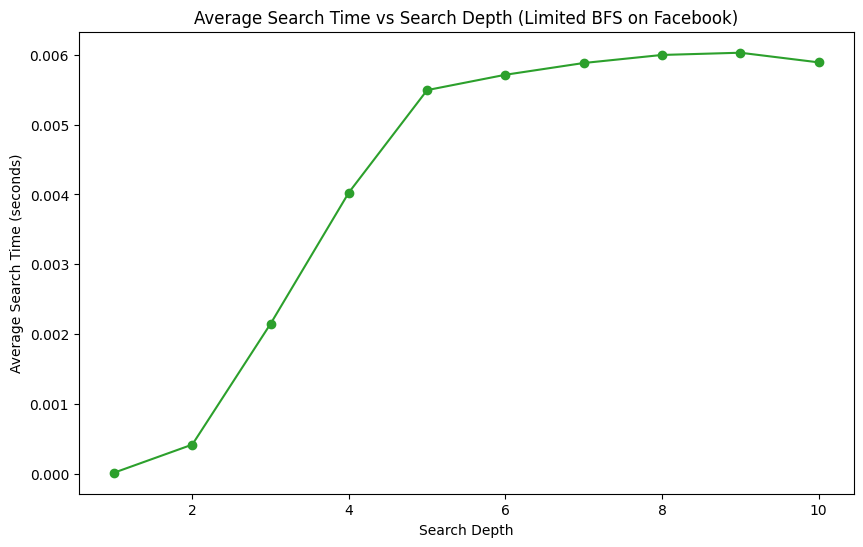

In [26]:
# visualize time_record vs depth_list
plt.figure(figsize=(10, 6))
plt.plot(depth_list, time_record, marker='o', linestyle='-', color='C2')
plt.title('Average Search Time vs Search Depth (Limited BFS on Facebook)')
plt.xlabel('Search Depth')
plt.ylabel('Average Search Time (seconds)')

We can see that as we increase the depth at first, the average search time increases significantly. This is because with a greater search depth, the algorithm explores more nodes, leading to longer execution times. However, after a certain point, the increase in search time becomes less pronounced. This could be due to the network's structure, at depth 8 most of nodes are already explored because the network has a small-world property, meaning that most nodes can be reached from every other by a small number of steps. Therefore, increasing the search depth beyond a certain point does not significantly increase the number of nodes explored, resulting in a plateau in execution time.

## Section 5: Analytical and Theoretical Questions (Written Response)

Answer the following conceptual questions in 1–2 paragraphs each:

### Q1: Why do real networks often exhibit both high clustering and efficient searchability?

That's because real networks, especially social networks, are structured in a way that promotes both local connectivity and global reachability. High clustering occurs because individuals tend to form tight-knit groups or communities where everyone knows each other, leading to a high likelihood of connections among neighbors. This local clustering is beneficial for efficient searchability because it allows for quick navigation within these communities. Additionally, real networks often have "shortcuts" or long-range connections that link different clusters together, enabling efficient traversal across the entire network. These shortcuts reduce the average path length between nodes, making it easier to find specific targets even in large networks.

### Q2: To what extent does the Watts–Strogatz model accurately represent real-world structures?

It captures some key features of real-world networks, such as high clustering and short average path lengths, which are characteristic of small-world networks. However, it has limitations in fully representing the complexity of real-world structures. For instance, the Watts–Strogatz model assumes a uniform rewiring probability across all nodes, which may not accurately reflect the heterogeneous nature of connections in real networks. Additionally, it does not account for other important properties observed in real-world networks, such as scale-free degree distributions or community structures. Therefore, while the Watts–Strogatz model provides valuable insights into certain aspects of network behavior, it may not fully encapsulate the intricacies of real-world networks.

### Q3: How does the Kleinberg model better explain the phenomenon of social search?

Kleinberg's model incorporates the concept of long-range connections that are more likely to link nodes that are closer in a social or geographical sense. This reflects the reality of social networks, where individuals are more likely to have connections with others who share similar characteristics or are in close proximity. The model demonstrates that when these long-range links are added in a way that reflects real-world social structures, it significantly enhances the efficiency of local search algorithms. In contrast to random networks, where long-range connections are uniformly distributed, Kleinberg's model shows that strategically placed long-range links can facilitate rapid navigation through the network, making it easier to find specific individuals or information. This aligns with empirical observations of social search behavior, where people often rely on their immediate social circles and a few well-placed connections to reach distant contacts efficiently.

### Q4: How is search time complexity related to structural properties of a network?

Search time complexity is closely related to the structural properties of a network, such as its **degree distribution**, **clustering coefficient**, and **average path length**. Networks with high **clustering coefficients** and **short average path lengths**, characteristic of small-world networks, tend to facilitate more efficient searches. In such networks, local search algorithms can quickly navigate through tightly-knit communities while leveraging long-range connections to reach distant nodes. Conversely, networks with low clustering and longer average path lengths may require more steps to find a target node, leading to increased search time complexity. Additionally, the presence of hubs or highly connected nodes in scale-free networks can significantly reduce search times, as these nodes serve as critical junctions that connect various parts of the network. Overall, the interplay between these structural properties determines how effectively information can be located within the network.